In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice.
mice = combine_data["Mouse ID"]. value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID": duplicate_mice["Mouse ID"].unique()})
duplicate_mice


,Mouse ID
0,g989


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combine_data.loc[combine_data["Mouse ID"] == "g989",:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [75]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

249

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_groups = clean_df.groupby(["Drug Regimen"])
regimen_mean = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

regimen_median = round(drug_groups["Tumor Volume (mm3)"].median(),2)

regimen_variance = round(drug_groups["Tumor Volume (mm3)"].var(),2)

regimen_std = round(drug_groups["Tumor Volume (mm3)"].std(),2)

regimen_sem = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

Drug_summarydf_a = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                                 "Median Tumor Volume": regimen_median,
                                 "Variance Tumor Volume": regimen_variance,
                                 "Standard Deviation Tumor Volume": regimen_std,
                                 "SEM Tumor Volume": regimen_sem
                                })
Drug_summarydf_a
                                 
                                

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [82]:
 Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Drug_summarydf_b = round(drug_groups["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]),2)

Drug_summarydf_b = Drug_summarydf_b.rename(columns = {"mean": "Mean Tumor Volume",
                                                      "median": "Median Tumor Volume",
                                                      "var": "Variance Tumor Volume",
                                                      "std": "Standard Dev Tumor Volume",
                                                      "sem": "SM Tumor Volume"})
Drug_summarydf_b

SyntaxError: invalid syntax (1687345278.py, line 1)

Text(0.5, 1.0, 'Number of Mice per Treatment')

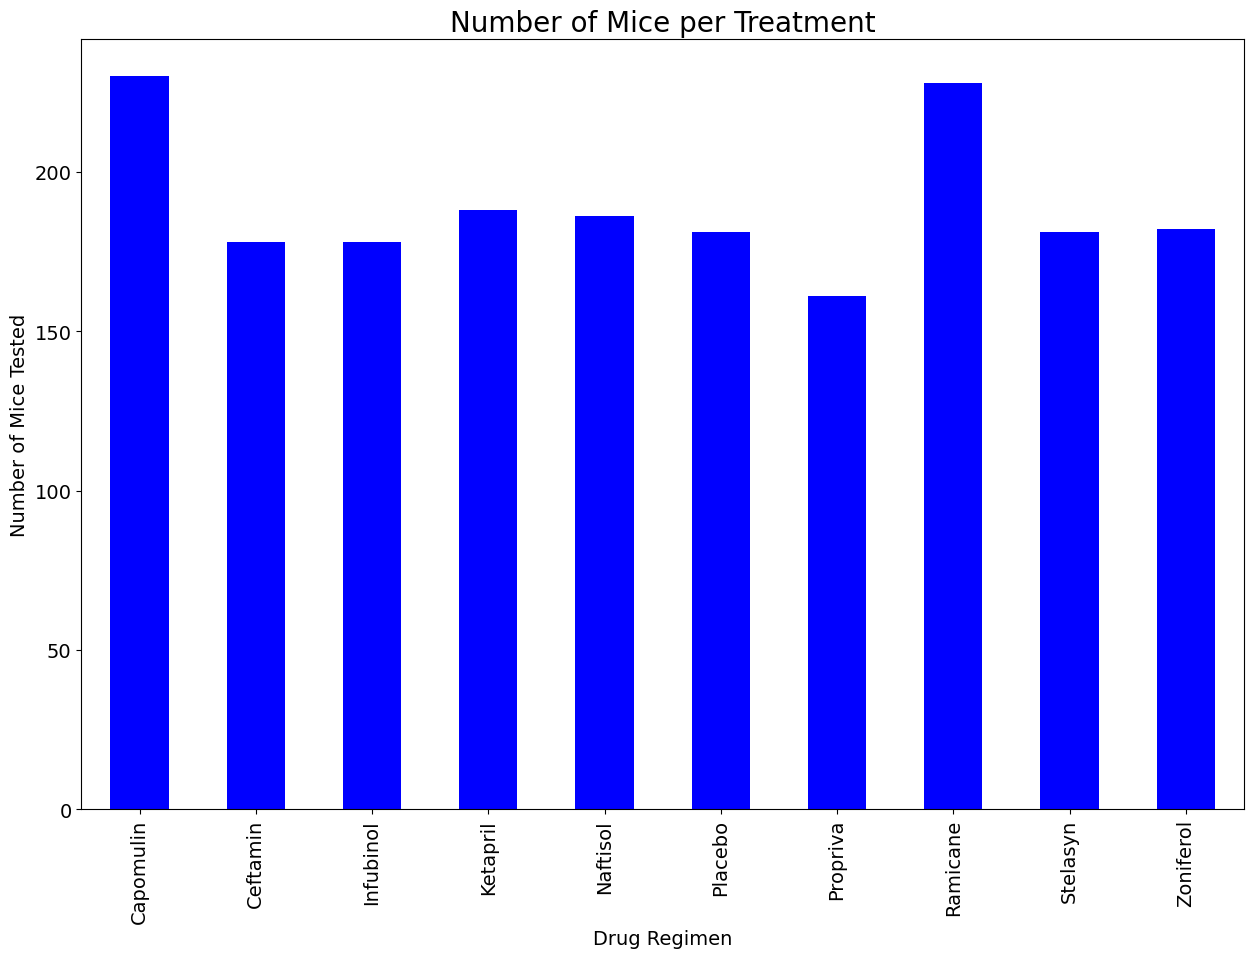

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_tret = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color ='b', fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice Tested", fontsize = 14)
plt.title("Number of Mice per Treatment", fontsize = 20)



Text(0.5, 1.0, 'Number of Mice per Treatment')

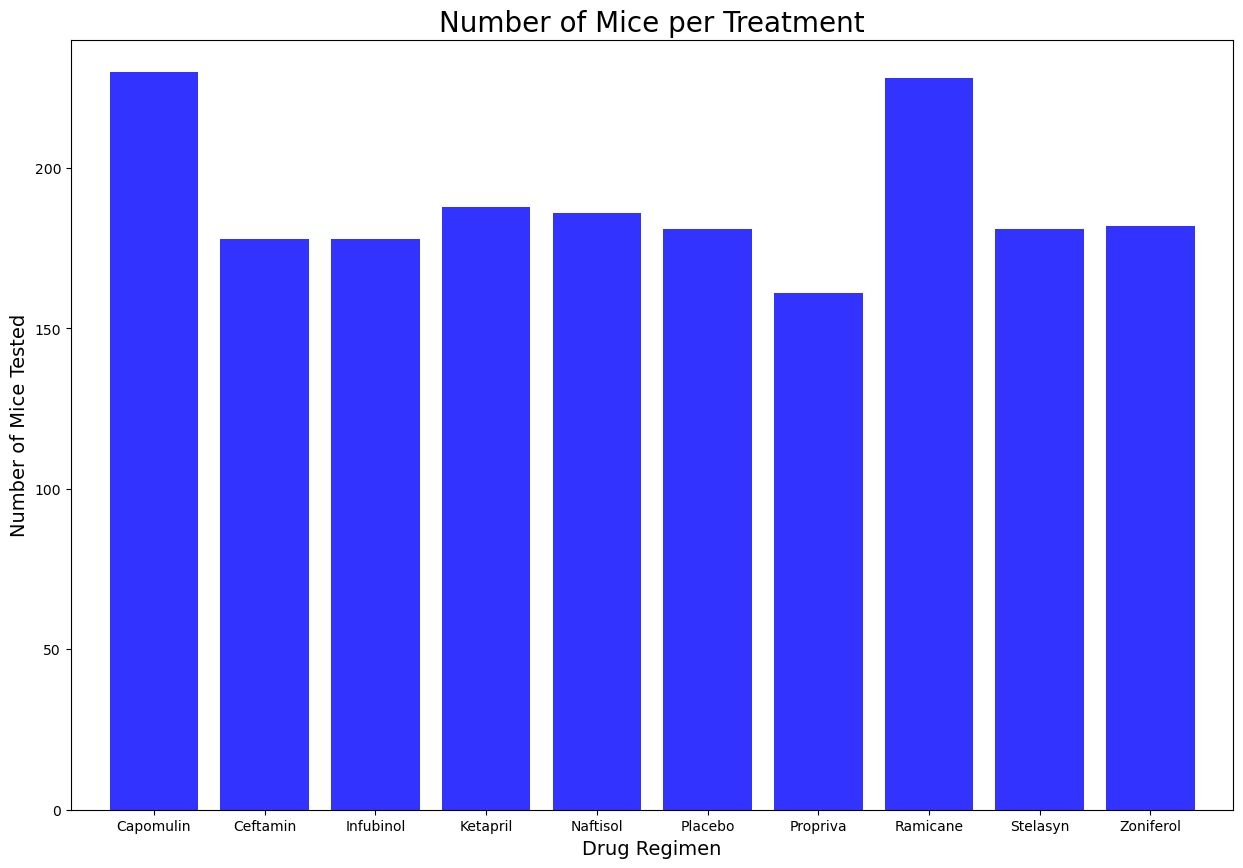

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list = (combine_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize = (15,10))
plt.bar(x_axis, mice_list, color = 'b', alpha = 0.8, align = 'center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)

plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice Tested", fontsize = 14)
plt.title("Number of Mice per Treatment", fontsize = 20)

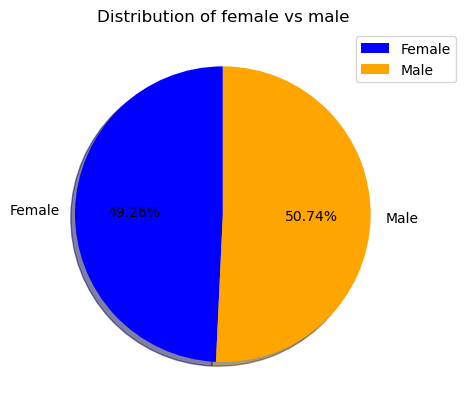

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_df.groupby(["Sex"]).count()
mice_piepd = mouse_sex.plot(kind ="pie", y = "Mouse ID", title = ("Distribution of female vs male"),
                        colors = ["blue","orange"], autopct = "%0.2f%%", shadow = True, startangle = 90)
mice_piepd.set_ylabel("")
mice_piepd.legend(loc = 'upper right', frameon = True, bbox_to_anchor = (1.15, 1))


(-1.1755066326598, 1.129125891541729, -1.1922583615934077, 1.1262834831032693)

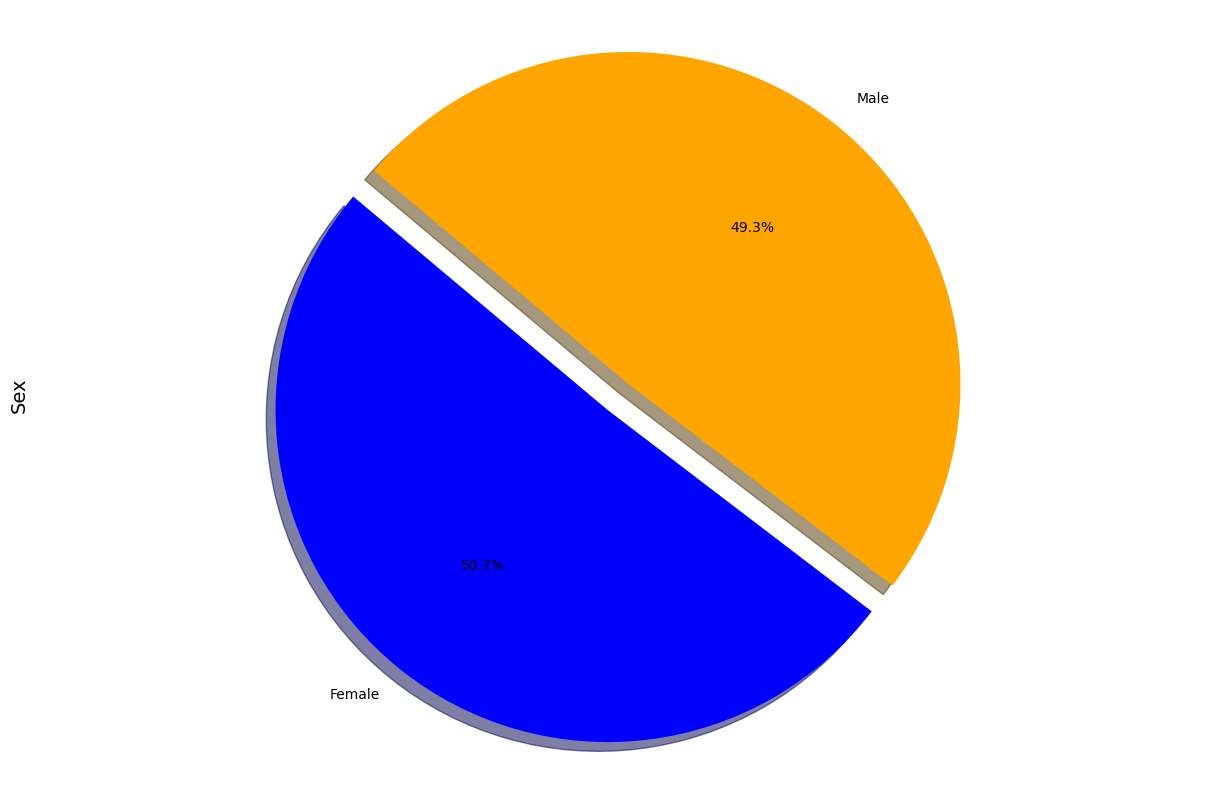

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_df["Sex"].value_counts()
labels = ["Female", "Male"]
sizes = [49, 51]
colors = ['blue', 'orange']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize =(15,10))
plt.pie(mice_sex, explode = explode, labels = labels, colors = colors, startangle = 140, shadow = True, autopct = "%1.1f%%")
plt.ylabel('Sex',fontsize = 14)
plt.axis('equal')


In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tx_df = pd.merge(max_timepoint, clean_df, on = (["Mouse ID", "Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [105]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
        tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
        tumor_vol = tx_regimen['Tumor Volume (mm3)']
        tumor_vol_data.append(tumor_vol)
    # add subset 
    
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0 - lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1 - lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2 - lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3 - lowerq3

 # Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5 * IQR0)
upper_bound0 = upperq0 + (1.5 * IQR0)

lower_bound1 = lowerq1 - (1.5 * IQR1)
upper_bound1 = upperq1 + (1.5 * IQR1)

lower_bound2 = lowerq2 - (1.5 * IQR2)
upper_bound2 = upperq2 + (1.5 * IQR2)

lower_bound3 = lowerq3 - (1.5 * IQR3)
upper_bound3 = upperq3 + (1.5 * IQR3)

#Print Values
print(f"For{treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For{treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For{treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For{treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

ForCapomulin values below 20.70456164999999 and above 51.83201549 could be outliers
ForRamicane values below 17.912664470000003 and above 54.30681135 could be outliers
ForInfubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
ForCeftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


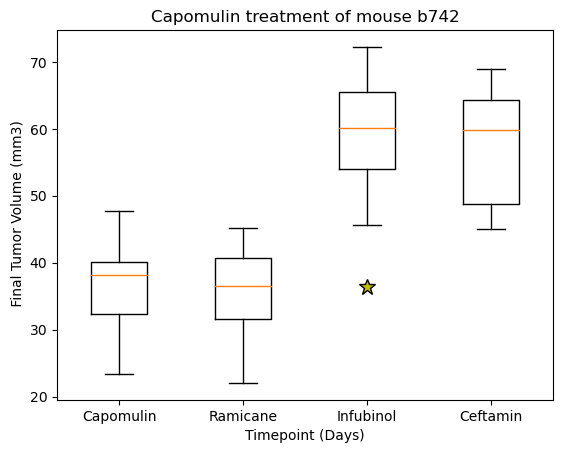

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = '*', markerfacecolor = 'y', markersize = 12, linestyle = 'none')

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin treatment of mouse b742')
ax1.set_xlabel('Timepoint (Days)')
ax1.set_ylabel(' Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()


In [114]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_l509 = clean_df.loc[clean_df["Mouse ID"] == "l509"]

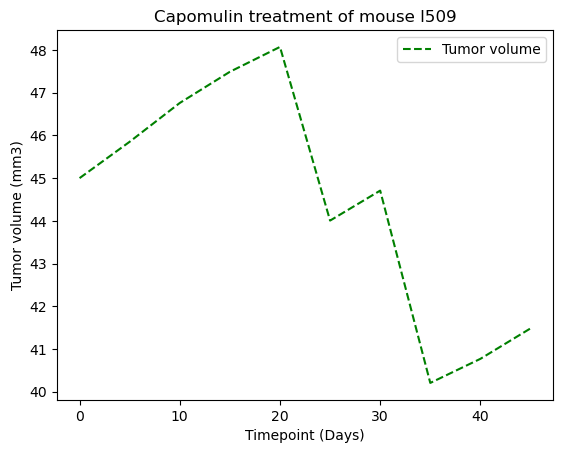

In [116]:
tumor_y = mouse_l509["Tumor Volume (mm3)"]
time_x = mouse_l509["Timepoint"]
plt.plot(time_x, tumor_y, color = "green", label = "Tumor volume", linestyle = "dashed")
plt.legend(loc="best")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel("Tumor volume (mm3)")
plt.show()


In [124]:
# Add the liner regression equation and line to plot

fig1, ax1 = plt.subplots(figsize = (15,10))
plt.scatter (avg_tumor_vol, avg_weight, marker = "0", facecolors "green", edgecolors = "orange",
             s = avg_tumor_vol, alpha = 0.75)
plt.plot(x_values, regress_values, "r-")
plt. titile('Regression Plot of Mouse Weight Versus Average Tumor Volume', fontsize = 20)
plt.xlabel('Weight (g)', fontsize = 14)
plt. ylabel('Average Tumor Volume (mm3)', fontsize = 14)
ax1.annotate(line_eq, xy = (20, 40), xycoords = 'data', xytext = (0.8, 0.95), textcoords = 'axes fraction')

print(f"The r-squared is: {rvalue **2})

SyntaxError: positional argument follows keyword argument (1704505433.py, line 4)